In [515]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [516]:
df=pd.read_csv("D:\\Sandesh\\Data Science\\Project - 1\\Dataset\\gold_list.csv")
#,index_col=1,parse_dates=[1],squeeze=False)
df.head()


,Unnamed: 0,Dates,Price
0,0,01-01-2011,"1,961"
1,1,02-01-2011,"1,961"
2,2,03-01-2011,"1,960"
3,3,04-01-2011,"1,957"
4,4,05-01-2011,"1,991"


In [517]:
df.dtypes

Unnamed: 0     int64
Dates         object
Price         object
dtype: object

In [518]:
del df['Unnamed: 0']
df['Dates']=pd.to_datetime(df['Dates'], dayfirst = True)
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype('int')
df

,Dates,Price
0,2011-01-01,1961
1,2011-01-02,1961
2,2011-01-03,1960
3,2011-01-04,1957
4,2011-01-05,1991
...,...,...
3972,2021-12-27,4703
3973,2021-12-28,4703
3974,2021-12-29,4703
3975,2021-12-30,4758


In [519]:
df

,Dates,Price
0,2011-01-01,1961
1,2011-01-02,1961
2,2011-01-03,1960
3,2011-01-04,1957
4,2011-01-05,1991
...,...,...
3972,2021-12-27,4703
3973,2021-12-28,4703
3974,2021-12-29,4703
3975,2021-12-30,4758


In [520]:
df.dtypes

Dates    datetime64[ns]
Price             int32
dtype: object

In [521]:
# How to extract year from the Dates columns.

df['year'] = df['Dates'].dt.year
df.head()

,Dates,Price,year
0,2011-01-01,1961,2011
1,2011-01-02,1961,2011
2,2011-01-03,1960,2011
3,2011-01-04,1957,2011
4,2011-01-05,1991,2011


In [524]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [533]:
df[df['year']=='2021']

df[df.Dates.dt.year.eq(2021)]

from scipy import stats
z = np.abs(stats.zscore(df['Price']))
a=(np.where(z > 3))

print(a)


(array([], dtype=int64),)


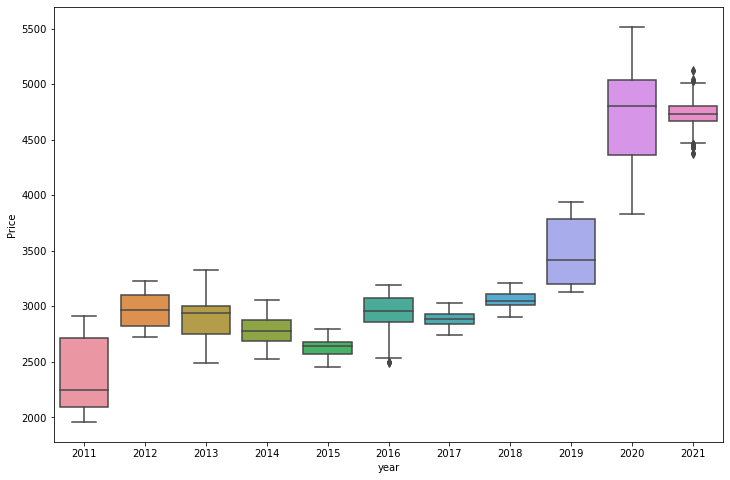

In [505]:
plt.figure(figsize=(12,8))

sns.boxplot(x = 'year',y='Price',data = df)
plt.show()

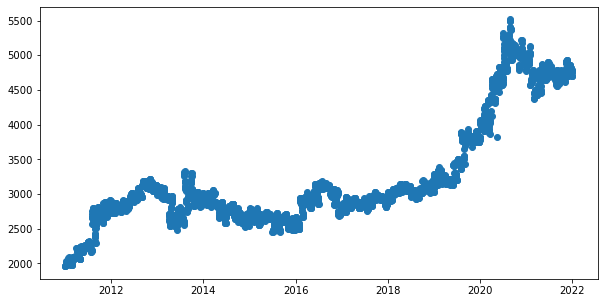

In [537]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Dates'], df['Price'])
 
    

In [471]:
df.describe()

,Price
count,3977.000000
mean,3222.480262
std,780.822847
min,1957.000000
25%,2759.000000
50%,2957.000000
75%,3220.000000
max,5517.000000


In [436]:
df.dtypes

Dates    datetime64[ns]
Price             int32
dtype: object

In [437]:
df_new=df.set_index('Dates').resample('MS').last()
df_new['Price']=df_new['Price'].astype('int')
df_new

,Price
Dates,
2011-01-01,2067
2011-02-01,1987
2011-03-01,2089
2011-04-01,2068
2011-05-01,2224
...,...
2021-08-01,4788
2021-09-01,4704
2021-10-01,4618


Text(0.5, 1.0, 'Line PLot')

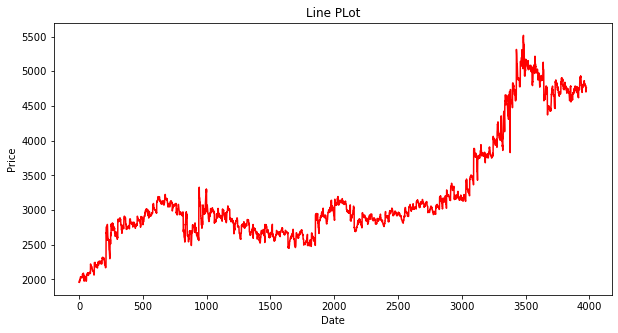

In [539]:

# Line Plot
plt.rcParams["figure.figsize"] = (10, 5)
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df['Price'],color='Red',linestyle='solid')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title('Line PLot')


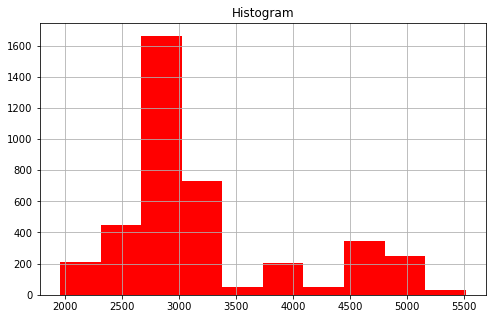

In [540]:
# Histogram

ax = plt.axes()
ax.set_facecolor("white")
df['Price'].hist(figsize=(8,5), color = 'red')
plt.title('Histogram')
plt.show()

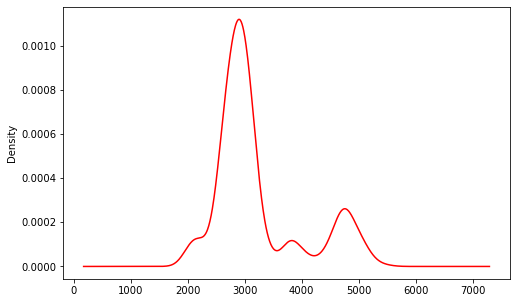

In [541]:

#Density Plot

ax = plt.axes()
ax.set_facecolor("white")
df['Price'].plot(kind = 'kde', figsize=(8,5), color = 'red')
plt.show()

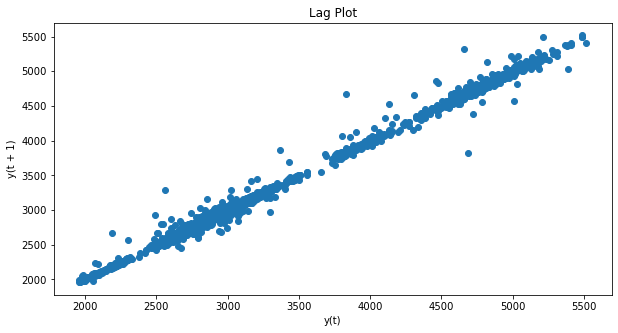

In [542]:
# Lag Plot

from pandas.plotting import lag_plot
lag_plot(df['Price'])
plt.title('Lag Plot')
plt.show()

In [348]:
df['Shift_1']=df['Price'].shift(+1)
df['Shift_2']=df['Price'].shift(+2)
df['Shift_3']=df['Price'].shift(+3)
df.head()


,Dates,Price,Shift_1,Shift_2,Shift_3
0,2011-01-01,1961,NaN,NaN,NaN
1,2011-01-02,1961,1961.0,NaN,NaN
2,2011-01-03,1960,1961.0,1961.0,NaN
3,2011-01-04,1957,1960.0,1961.0,1961.0
4,2011-01-05,1991,1957.0,1960.0,1961.0


In [349]:
df.dropna(inplace=True,axis=0)

In [350]:
df

,Dates,Price,Shift_1,Shift_2,Shift_3
3,2011-01-04,1957,1960.0,1961.0,1961.0
4,2011-01-05,1991,1957.0,1960.0,1961.0
5,2011-01-06,1977,1991.0,1957.0,1960.0
6,2011-01-07,1979,1977.0,1991.0,1957.0
7,2011-01-08,2006,1979.0,1977.0,1991.0
...,...,...,...,...,...
3972,2021-12-27,4703,4787.0,4782.0,4801.0
3973,2021-12-28,4703,4703.0,4787.0,4782.0
3974,2021-12-29,4703,4703.0,4703.0,4787.0
3975,2021-12-30,4758,4703.0,4703.0,4703.0


In [351]:
import numpy as np
x1,x2,x3,y=df['Shift_1'],df['Shift_2'],df['Shift_3'],df['Price']
x3

3       1961.0
4       1961.0
5       1960.0
6       1957.0
7       1991.0
         ...  
3972    4801.0
3973    4782.0
3974    4787.0
3975    4703.0
3976    4703.0
Name: Shift_3, Length: 3974, dtype: float64

In [352]:

# Converting into numpy pi array

x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
print(x1)

[1960. 1957. 1991. ... 4703. 4703. 4758.]


In [353]:

# reshaping the values
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
x1

array([[1960.],
       [1957.],
       [1991.],
       ...,
       [4703.],
       [4703.],
       [4758.]])

In [354]:

# Combining the 3 columns and making it into 1 columns.

final_values=np.concatenate((x1,x2,x3),axis=1)
print(final_values)
final_values.shape


[[1960. 1961. 1961.]
 [1957. 1960. 1961.]
 [1991. 1957. 1960.]
 ...
 [4703. 4703. 4787.]
 [4703. 4703. 4703.]
 [4758. 4703. 4703.]]


(3974, 3)

In [355]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3944, 3), (30, 3), (3944, 1), (30, 1))

In [368]:
y_test.shape

(30, 1)

In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from math import sqrt

In [358]:


lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
lin_pred=lin_model.predict(X_test)
r2_score2_lr=(r2_score(lin_pred,y_test))
mse_lr=(mean_squared_error(lin_pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

dtree_model=DecisionTreeRegressor(max_depth=5)
dtree_model.fit(X_train,y_train)
dtree_pred=dtree_model.predict(X_test)
r2_score_dt=(r2_score(dtree_pred,y_test))
mse_dt=(mean_squared_error(dtree_pred,y_test))
rmse_dt=sqrt(mean_squared_error(dtree_pred,y_test))



random_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
random_model.fit(X_train,y_train)
random_pred=random_model.predict(X_test)
r2_score_rf=(r2_score(random_pred,y_test))
rmse_rf=sqrt(mean_squared_error(random_pred,y_test))
mse_rf=(mean_squared_error(random_pred,y_test))


gradient_model=GradientBoostingRegressor(n_estimators=100,max_features=3, random_state=100)
gradient_model.fit(X_train,y_train)
gradient_pred=gradient_model.predict(X_test)
rmse_gb=sqrt(mean_squared_error(gradient_pred,y_test))
r2_score_gb=(r2_score(gradient_pred,y_test))
mse_gb=(mean_squared_error(gradient_pred,y_test))


ada_model=AdaBoostRegressor(n_estimators=100, random_state=100)
ada_model.fit(X_train,y_train)
ada_pred=ada_model.predict(X_test)
rmse_ab=sqrt(mean_squared_error(ada_pred,y_test))
r2_score_ab=(r2_score(ada_pred,y_test))
mse_ab=(mean_squared_error(ada_pred,y_test))



#xgb_model=XGBRegressor(n_estimators=100,max_features=3, random_state=100)
#xgb_model.fit(X_train,y_train)



In [359]:

dict= {'r2_score':[r2_score2_lr,r2_score_dt,r2_score_rf,r2_score_gb,r2_score_ab],
       'MSE':[mse_lr,mse_dt,mse_rf,mse_gb,mse_ab],
       'RMSE':[rmse_lr,rmse_dt,rmse_rf,rmse_gb,rmse_ab] } 

df_score=pd.DataFrame(dict,index=['Linear','Decision','Random','Gradient','adaboost'])    
df_score

,r2_score,MSE,RMSE
Linear,0.566691,645.387744,25.404483
Decision,-0.185452,3391.407350,58.235791
Random,0.541988,1081.012692,32.878757
Gradient,0.483275,1052.464146,32.441704
adaboost,-421.073151,2214.888890,47.062606


In [365]:
lin_pred=lin_model.predict(X_test)
result=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':lin_pred.flatten()})
result.head()

,Actual,Predicted
0,4763,4779.000435
1,4763,4762.261900
2,4807,4761.912829
3,4806,4802.392872
4,4811,4803.423665


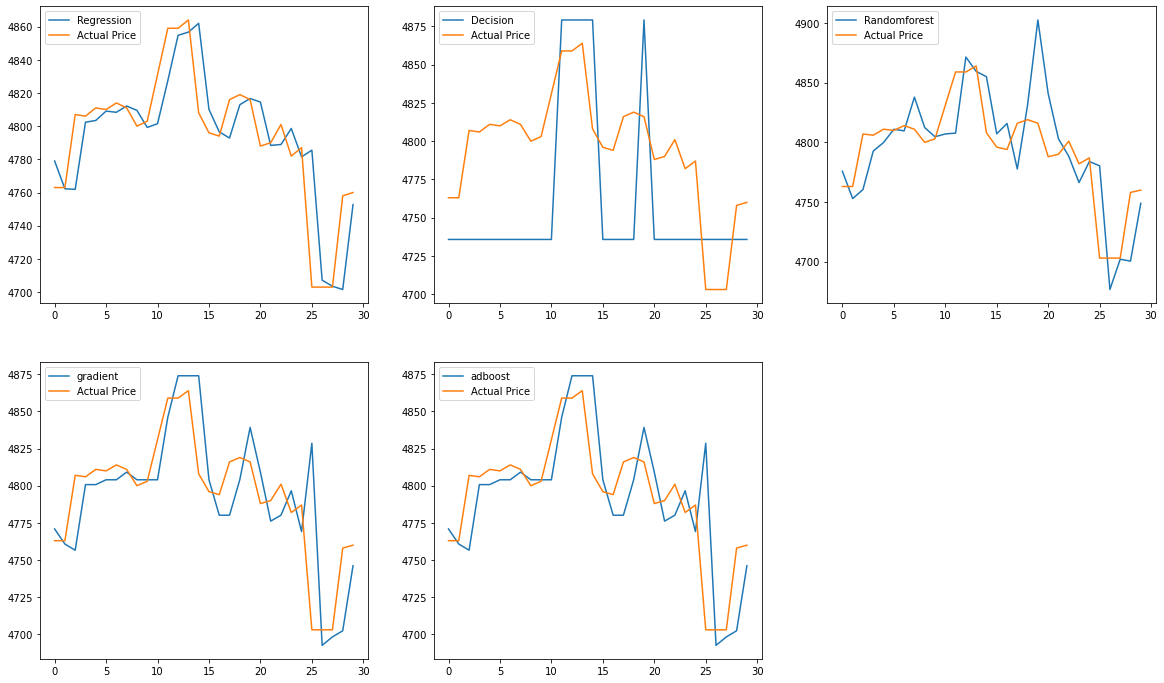

In [260]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)
plt.title('Forecasting')

plt.subplot(2, 3, 1)
plt.plot(lin_pred,label='Regression')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")

plt.subplot(2, 3, 2)
plt.plot(dtree_pred,label='Decision')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")

plt.subplot(2, 3, 3)
plt.plot(random_pred,label='Randomforest')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")

plt.subplot(2, 3, 4)
plt.plot(gradient_pred,label='gradient')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")

plt.subplot(2, 3, 5)
plt.plot(gradient_pred,label='adboost')
plt.plot(y_test,label='Actual Price')
plt.legend(loc="upper left")



plt.show()

# THE END 